# Exploratory Data Analysis

### Imports

In [3]:
import pandas as pd
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

BASE_SIMULATION_DIR = 'data/simulations/'
BASE_MEASURE_DIR = 'data/measures/'
C = 'consensus_time'
F = 'opinion_change_frequency'

## Reading CSV files

### Measures

In [4]:
measures_file_list = []
for network in os.listdir(BASE_MEASURE_DIR):
    df = pd.read_csv(BASE_MEASURE_DIR + network, index_col=0)
    df.insert(0, 'type', network.split('.')[0])
    measures_file_list.append(df)
    
measures_df = pd.concat(measures_file_list)

FEATURES = list(measures_df.columns)

In [5]:
measures_df = measures_df.rename_axis(['network'])

In [6]:
measures_df = measures_df[(measures_df['average_shortest_path_lenght'] != np.inf) & (measures_df['closeness'] != np.nan)]
measures_df.describe()

,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,0.124723,0.306941,1445.612743,3.890225,0.199581,-0.027939,0.003352,0.007609
std,0.221348,0.094263,1075.834041,2.151668,0.175515,0.152078,0.000871,0.006254
min,0.008343,0.096122,548.311000,2.095622,0.029795,-0.394020,0.001307,0.003230
25%,0.023910,0.304567,1007.193250,3.013387,0.061138,-0.078335,0.002967,0.005002
50%,0.027664,0.314519,1098.013000,3.195026,0.093410,-0.012530,0.003628,0.005270
75%,0.067528,0.333580,1144.626500,3.288253,0.381908,0.027415,0.004044,0.005572
max,0.652846,0.478556,4797.811000,10.594622,0.621034,0.204217,0.004293,0.027219


### Simulations

In [63]:
simulations_file_list = []
for network in os.listdir(BASE_SIMULATION_DIR):
    df = pd.read_csv(BASE_SIMULATION_DIR + network, index_col=0, header=[0,1])
    simulations_file_list.append(df)

simulations_df = pd.concat(simulations_file_list)

In [68]:
simulations_df = simulations_df.stack(level=0, future_stack=True).rename_axis(['network','initialization']).reset_index()

In [69]:
simulations_df

,network,initialization,consensus_time,opinion_change_frequency
0,barabasi_linear_60.edgelist,random,471.08,248.74
1,barabasi_linear_60.edgelist,direct,535.92,200.00
2,barabasi_linear_60.edgelist,inverse,323.41,386.60
3,barabasi_linear_91.edgelist,random,431.67,248.66
4,barabasi_linear_91.edgelist,direct,519.85,200.00
...,...,...,...,...
2095,watts-strogatz_76.edgelist,direct,41172.93,7879.43
2096,watts-strogatz_76.edgelist,inverse,37483.28,6954.85
2097,watts-strogatz_69.edgelist,random,13790.04,1911.82
2098,watts-strogatz_69.edgelist,direct,43281.68,7024.76


### Merging and creating the dataset

In [70]:
dataset = measures_df.merge(simulations_df, on='network', how='inner')

In [71]:
from sklearn.preprocessing import LabelEncoder
dataset['groups'] = LabelEncoder().fit_transform(dataset['type'])
dataset.reset_index(inplace=True)

In [72]:
dataset

,index,network,type,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality,initialization,consensus_time,opinion_change_frequency,groups
0,0,barabasi_linear_60.edgelist,barabasi_linear,0.032393,0.333205,1008.953,3.016906,0.082985,-0.012140,0.003442,0.005008,random,471.08,248.74,1
1,1,barabasi_linear_60.edgelist,barabasi_linear,0.032393,0.333205,1008.953,3.016906,0.082985,-0.012140,0.003442,0.005008,direct,535.92,200.00,1
2,2,barabasi_linear_60.edgelist,barabasi_linear,0.032393,0.333205,1008.953,3.016906,0.082985,-0.012140,0.003442,0.005008,inverse,323.41,386.60,1
3,3,barabasi_linear_91.edgelist,barabasi_linear,0.032772,0.335566,998.585,2.996170,0.081414,-0.026616,0.003427,0.004956,random,431.67,248.66,1
4,4,barabasi_linear_91.edgelist,barabasi_linear,0.032772,0.335566,998.585,2.996170,0.081414,-0.026616,0.003427,0.004956,direct,519.85,200.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,1969,watts-strogatz_76.edgelist,watts-strogatz,0.645758,0.117242,3798.980,8.596960,0.429491,0.008234,0.001636,0.021184,direct,41172.93,7879.43,5
1970,1970,watts-strogatz_76.edgelist,watts-strogatz,0.645758,0.117242,3798.980,8.596960,0.429491,0.008234,0.001636,0.021184,inverse,37483.28,6954.85,5
1971,1971,watts-strogatz_69.edgelist,watts-strogatz,0.646363,0.116023,3854.486,8.707972,0.606427,-0.011195,0.001584,0.021171,random,13790.04,1911.82,5
1972,1972,watts-strogatz_69.edgelist,watts-strogatz,0.646363,0.116023,3854.486,8.707972,0.606427,-0.011195,0.001584,0.021171,direct,43281.68,7024.76,5


### Creating Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

## Networks Boxplots for each Measure

In [13]:
sns.set_theme(rc={'figure.figsize':(15,6)})

### Clustering
It is possible to see how Watts Strogatz networks presents elevated Clustering Coefficient

<Axes: xlabel='clustering'>

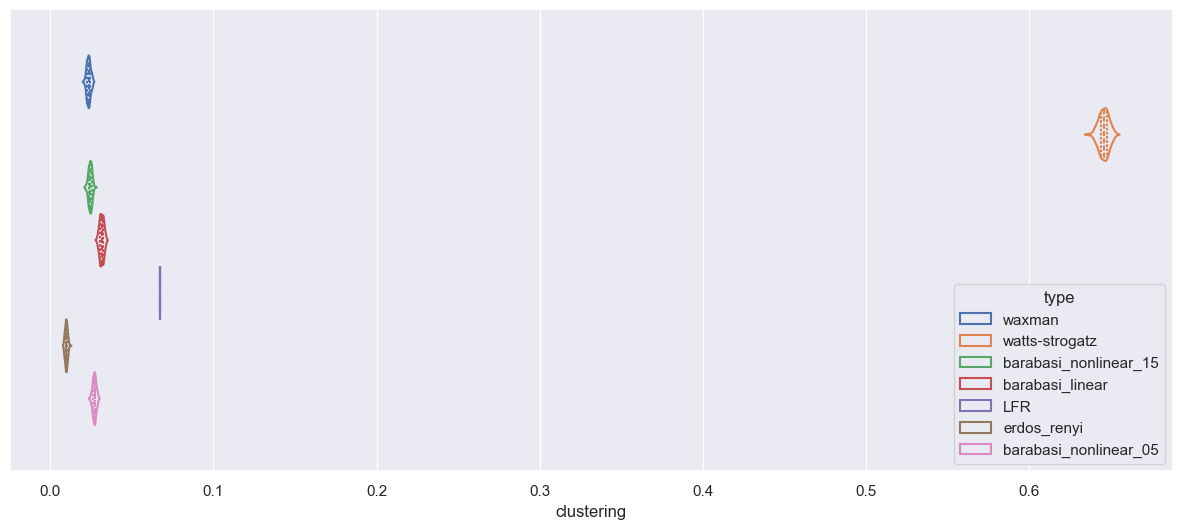

In [ ]:
sns.violinplot(
    data=measures_df, 
    x="clustering", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Assortativity
The plot shows Barabasi Non-Linear with $p=1.5$ having negative assortativity, indicating the tendency of nodes to attach to different ones. There is a neutral pattern in Watts-Strogatz, Barabasi-Linear and Erdos Renyi graphs. At last, we see homophily happening with Waxman and Barabasi Non-Linear with $p=0.5$

<Axes: xlabel='assortativity'>

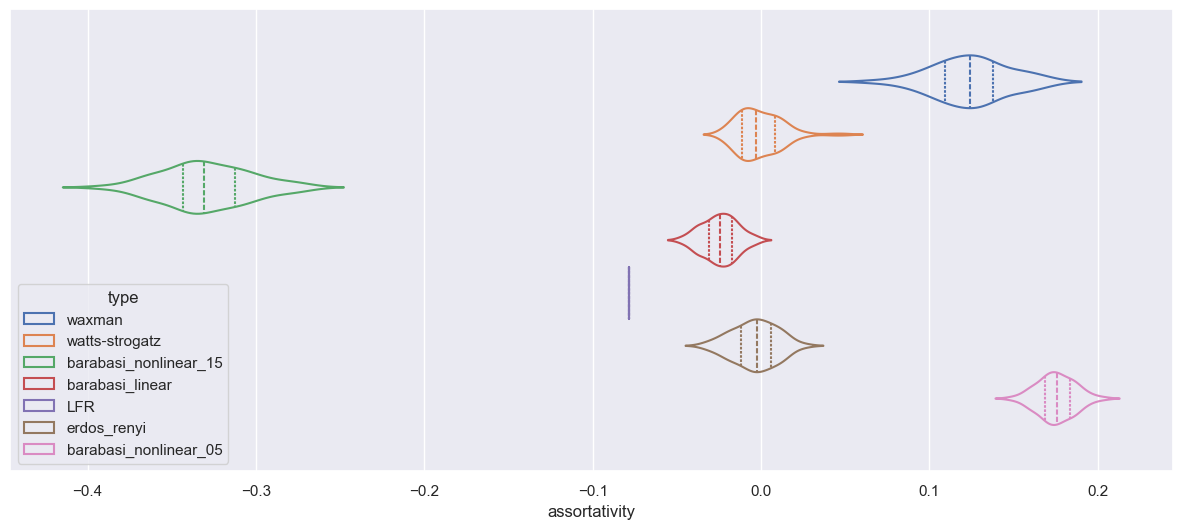

In [ ]:
sns.violinplot(
    data=measures_df, 
    x="assortativity", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Closeness
At the extremes of the plot, we can see Watts-Strogatz networks having a smaller amount of central nodes and Barabasi Non-Linear with $p=1.5$ with high amount of central nodes

<Axes: xlabel='closeness'>

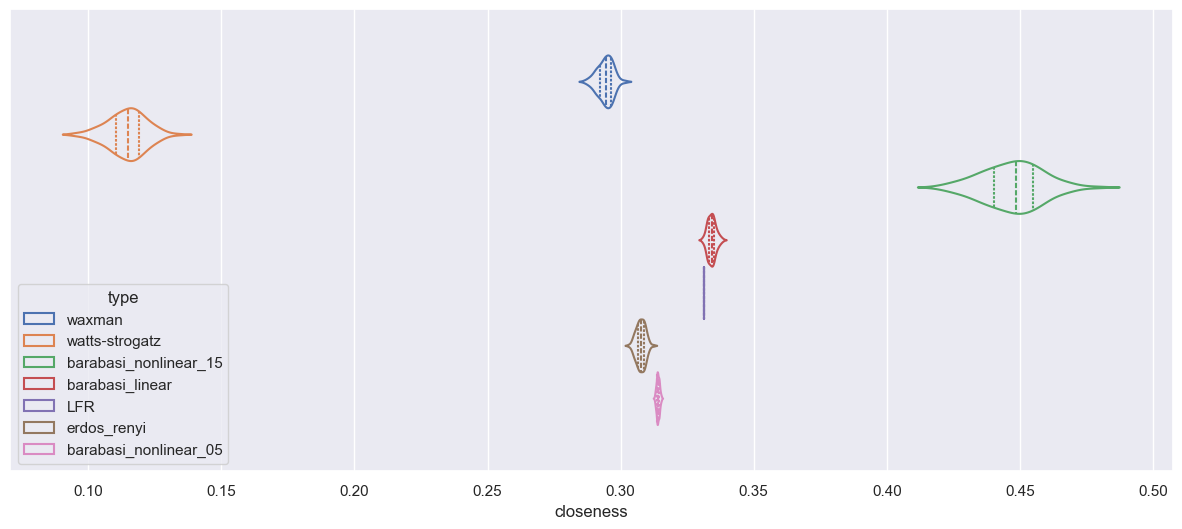

In [ ]:
sns.violinplot(
    data=measures_df, 
    x="closeness", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Betweenness

This graph shows clearly the disparity of Watts-Strogatz networks to have higher nodes that are present in Shortest Path Lenghts

<Axes: xlabel='betweenness'>

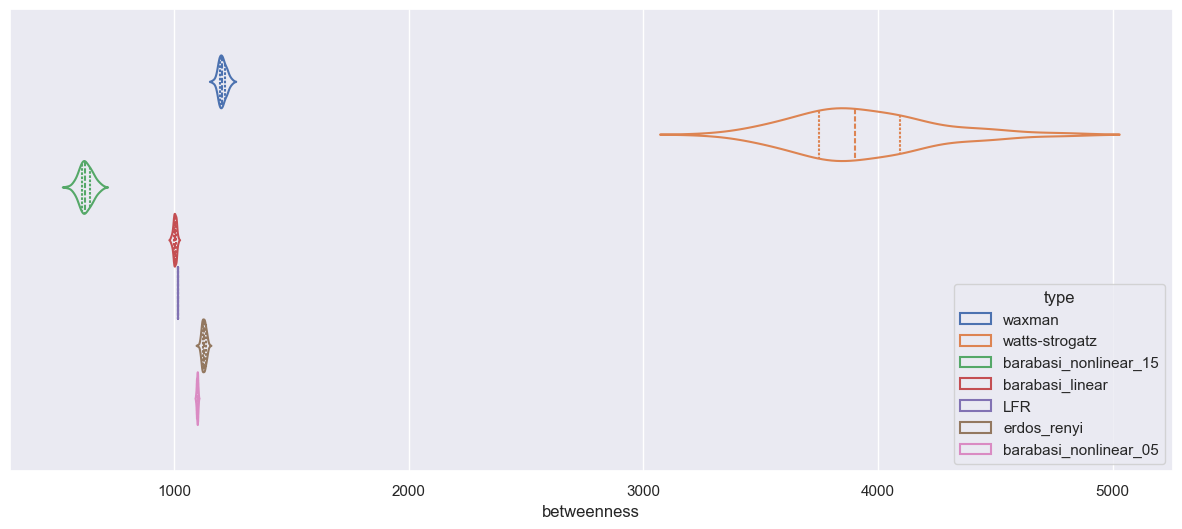

In [ ]:
sns.violinplot(
    data=measures_df, 
    x="betweenness", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Average Shortest Path Lenght
Watts-Strogatz is also the networks with higher Average Shortest Path Lenght

<Axes: xlabel='average_shortest_path_lenght'>

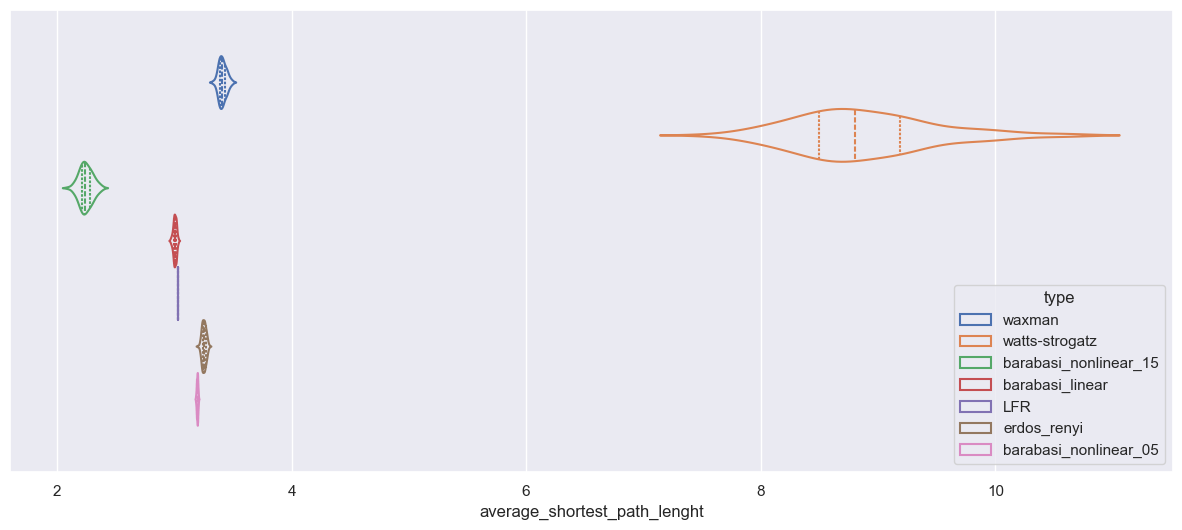

In [ ]:
sns.violinplot(
    data=measures_df, 
    x="average_shortest_path_lenght", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Eigenvector

<Axes: xlabel='eigenvector'>

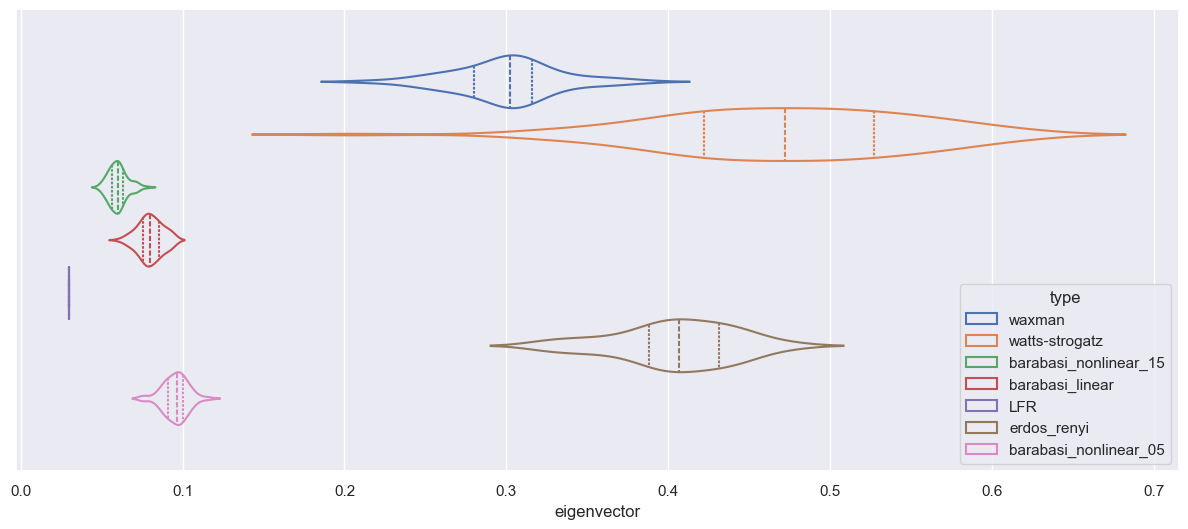

In [ ]:
sns.violinplot(
    data=measures_df, 
    x="eigenvector", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Information Centrality
Centralidade de Informacao

<Axes: xlabel='information_centrality'>

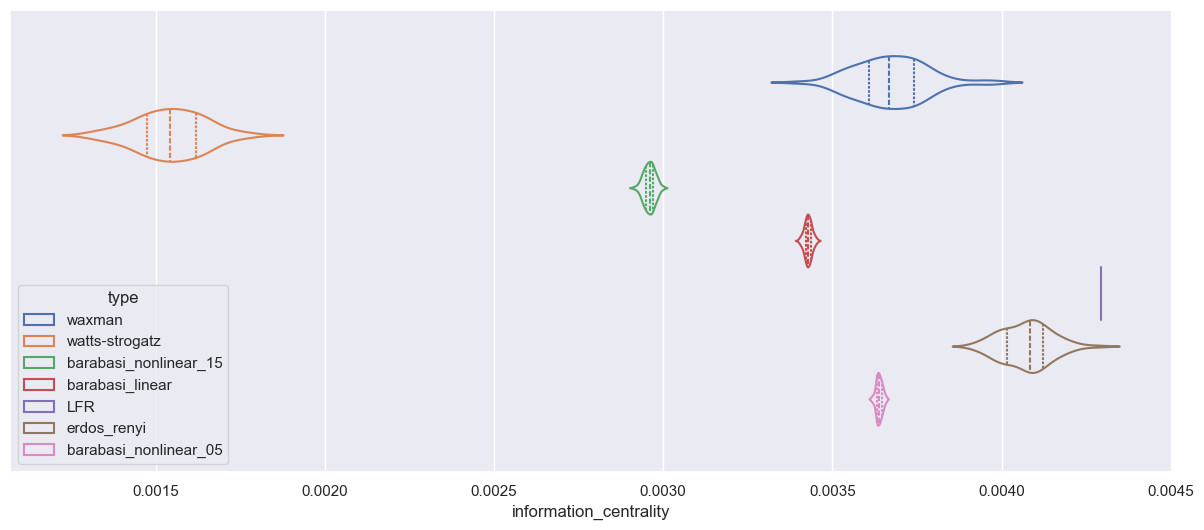

In [ ]:
sns.violinplot(
    data=measures_df, 
    x="information_centrality", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Approximate Current Flow Betweenness Centrality

<Axes: xlabel='approximate_current_flow_betweenness_centrality'>

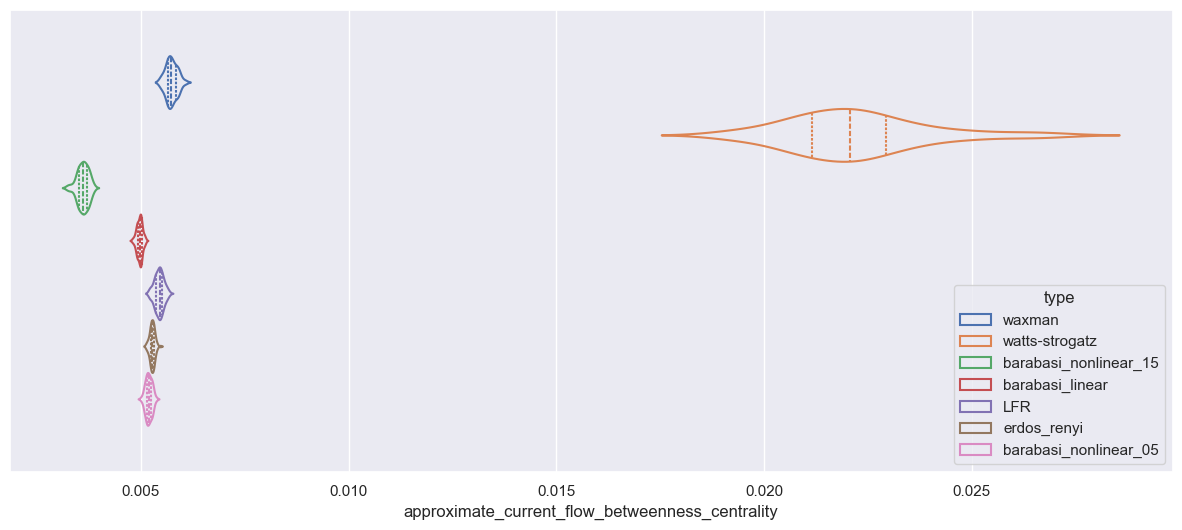

In [ ]:
sns.violinplot(
    data=measures_df, 
    x="approximate_current_flow_betweenness_centrality", 
    hue="type", 
    inner='quart',
    fill=False,
)

## Network Metrics for each Initialization

In [91]:
sns.set_theme()

In [87]:
np.unique(dataset['type'])

array(['LFR', 'barabasi_linear', 'barabasi_nonlinear_05',
       'barabasi_nonlinear_15', 'erdos_renyi', 'watts-strogatz', 'waxman'],
      dtype=object)

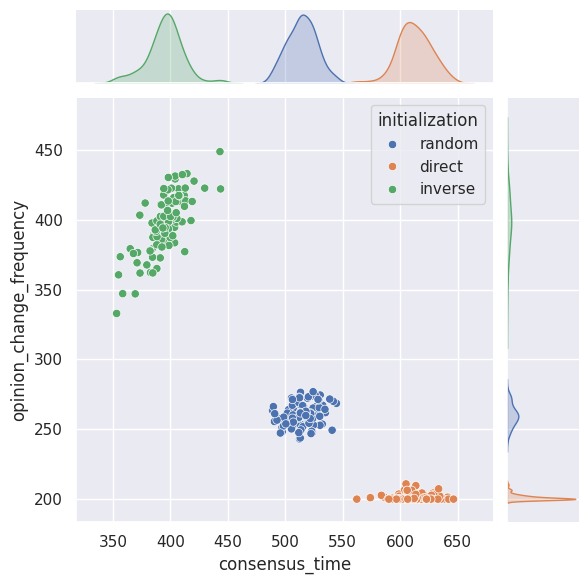

In [111]:
sns.jointplot(
    data=dataset[dataset['type'] == 'barabasi_nonlinear_05'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
    # kind="kde",
)

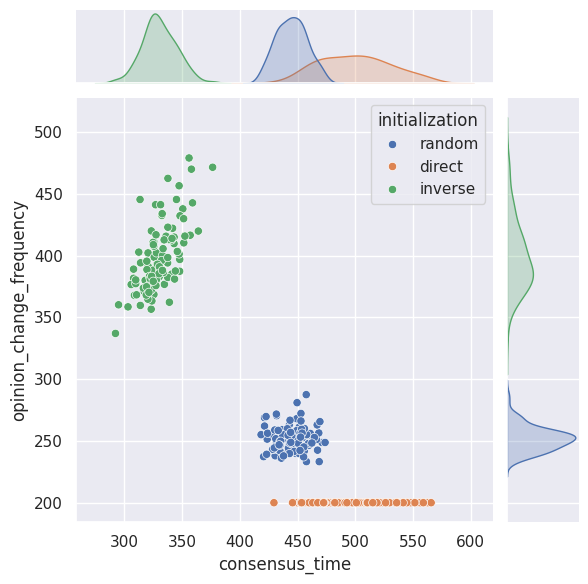

In [113]:
sns.jointplot(
    data=dataset[dataset['type'] == 'barabasi_linear'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)

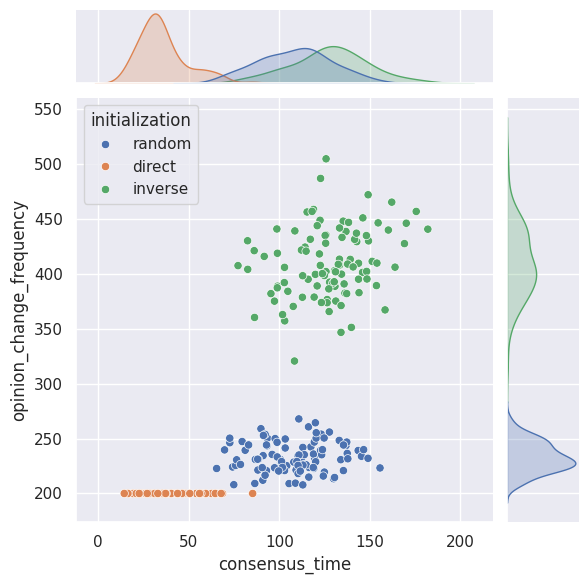

In [109]:
sns.jointplot(
    data=dataset[dataset['type'] == 'barabasi_nonlinear_15'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)

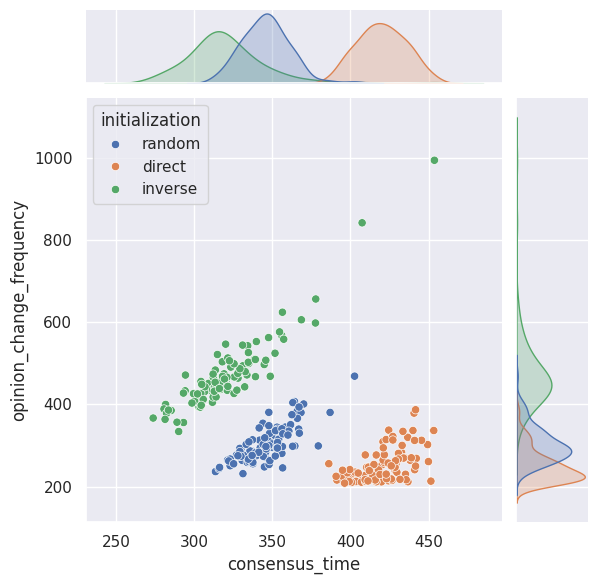

In [98]:
sns.jointplot(
    data=dataset[dataset['type'] == 'LFR'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)

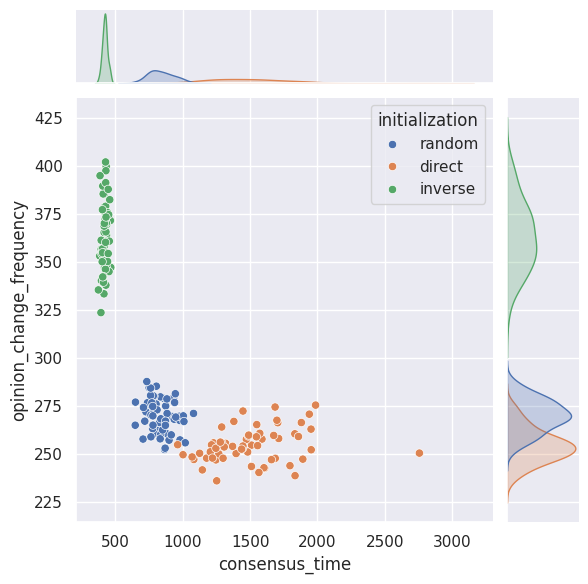

In [104]:
sns.jointplot(
    data=dataset[dataset['type'] == 'waxman'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)

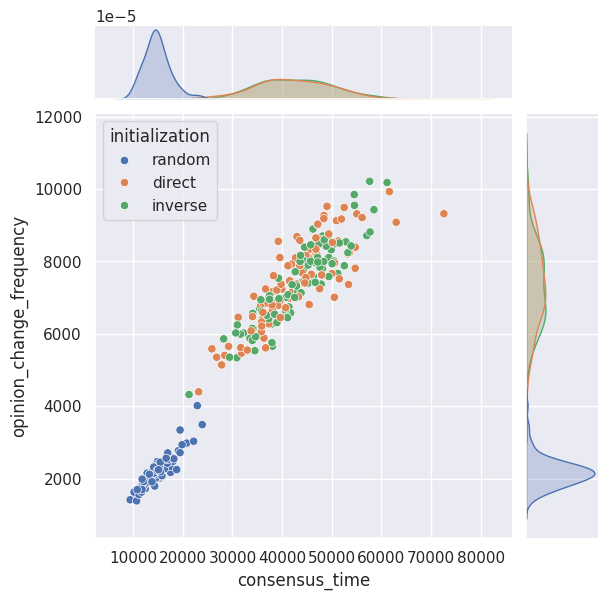

In [101]:
sns.jointplot(
    data=dataset[dataset['type'] == 'watts-strogatz'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)

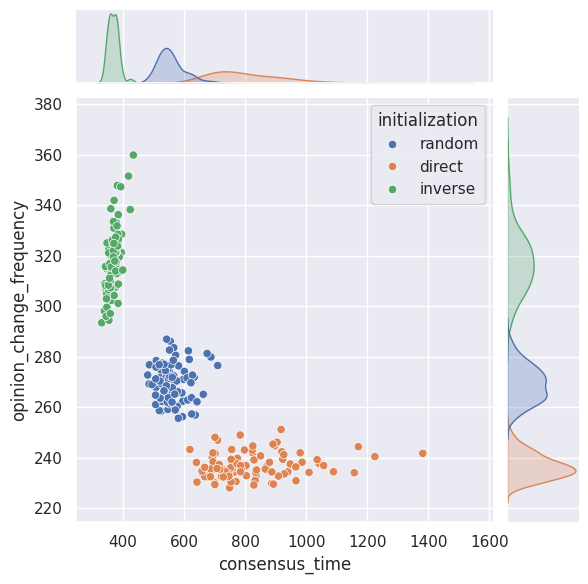

In [108]:
sns.jointplot(
    data=dataset[dataset['type'] == 'erdos_renyi'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)